# 3D tenzor transzformálása

A feladat a következő számolás elvégzése:
\begin{equation}
b_{ijk} = \sum_x \sum_y\sum_z a_{xyz}M_{ix}^{(1)}M_{jy}^{(2)}M_{kz}^{(3)}
\end{equation}

# Program felépítése

Készítettem egy tensor.hpp nevű fájlt, amelynek az a célja, hogy adjon egy egyszerű elérést 2D és 3D tenzorokhoz. Ide írtam még olyan függvényt ami fájlból beolvas egy mátrixot. Ez a fájl egy matrix nevezetű template osztályt tartalmaz, amelynek első template paramétere a mátrix elemeinek típusa, második pedig a mátrix dimenziója. A tárolásra std::vector-t használ.


A genMatrix.cpp programot azért írtam, hogy egyszerűen tudjak generálni tetszőleges méretű random mátrixot és ezt fájlba tudjam menteni (ez csak egy segédprogram).

A test2D.cpp fájlban implementáltam az órán bemutatott blokkositást a matrix osztályt használva, ezt csak azért csináltam hogy megértsem a blokkosítást. 

A main.cpp a lényeg, itt van a feladat megoldása.

# Fordítás

In [1]:
%%bash
clang++ -std=c++14 genMatrix.cpp -o genMatrix

In [2]:
%%bash
clang++ -std=c++14 test2D.cpp -o test2D

In [3]:
%%bash
clang++ -std=c++14 main.cpp -o main

In [4]:
ls -laht genMatrix test2D main

-rwxr-xr-x 1 attila users 65K Jun 19 13:47 main*
-rwxr-xr-x 1 attila users 55K Jun 19 13:47 test2D*
-rwxr-xr-x 1 attila users 52K Jun 19 13:47 genMatrix*


# 2D*2D tesztelés

### Generálok 2 darab 2x2-es mátrixot

In [5]:
%%bash
./genMatrix 1024x1024 > mat2d_1
./genMatrix 1024x1024 > mat2d_2
ls -laht mat2d_*

-rw-r--r-- 1 attila users 8.5M Jun 19 13:48 mat2d_2
-rw-r--r-- 1 attila users 8.5M Jun 19 13:48 mat2d_1
-rw-r--r-- 1 attila users 2.2K Jun 19 13:47 mat2d_3


In [6]:
%%bash
./test2D 64   #blokk meret

Sum of abs of difference: 8.84015e-05
Non block version time: 59853 ms
Block version time (b=64): 25410 ms


# Naiv blokkosítás a 3D tenzor transzformációra

In [7]:
%%bash
./genMatrix 16x16 > mat2d_1
./genMatrix 16x16 > mat2d_2
./genMatrix 16x16 > mat2d_3
./genMatrix 16x16x16 > mat3d
ls -laht mat*

-rw-r--r-- 1 attila users  34K Jun 19 13:49 mat3d
-rw-r--r-- 1 attila users 2.2K Jun 19 13:49 mat2d_3
-rw-r--r-- 1 attila users 2.2K Jun 19 13:49 mat2d_2
-rw-r--r-- 1 attila users 2.2K Jun 19 13:49 mat2d_1


In [8]:
%%bash
./main 4 0 "test"

Sum of abs of difference: 0.00494705
Non block version time: 847 ms
Block version time (b=4): 936 ms


Ez a verzió nem igazán hasznos, ezért csináltam egy másik változatot is.

# Gyors megoldás

In [9]:
%%bash
./main 4 1 "test"

Sum of abs of difference: 0.00487664
Non block version time: 831 ms
Block version time (b=4): 7 ms


Látható, hogy az eredeti blokkosítás nélküli szorzás és a blokkosított verzió közötti eltérések abszolút értékét ha felösszegezzük nagyon kis értéket kapunk (azért nem egzaktul nulla mert kerekítési hibák vannak). Tehát az algoritmus amit írtam valószínűleg jól működik és elképesztően gyors a naiv változathoz képest. Az eredményt a result nevű fájlba került, a biztos jó változat és a blokkosított változat közti különbségmátrix pedig a difference nevezetű fájlba.

In [10]:
%%bash
ls -lah result difference

-rw-r--r-- 1 attila users 47K Jun 19 13:49 difference
-rw-r--r-- 1 attila users 50K Jun 19 13:49 result


# Számolási idő függése a mátrixmérettől

In [11]:
%%bash
./genMatrix 32x32 > mat2d_1
./genMatrix 32x32 > mat2d_2
./genMatrix 32x32 > mat2d_3
./genMatrix 32x32x32 > mat3d
ls -laht mat*

-rw-r--r-- 1 attila users 270K Jun 19 13:50 mat3d
-rw-r--r-- 1 attila users 8.5K Jun 19 13:50 mat2d_3
-rw-r--r-- 1 attila users 8.5K Jun 19 13:50 mat2d_2
-rw-r--r-- 1 attila users 8.5K Jun 19 13:50 mat2d_1


In [12]:
%%bash
./main 4 1

Block size = 4; time = 136 ms


In [13]:
%%bash
./main 8 1

Block size = 8; time = 141 ms


In [14]:
%%bash
./main 16 1

Block size = 16; time = 121 ms


In [15]:
%%bash
./genMatrix 64x64 > mat2d_1
./genMatrix 64x64 > mat2d_2
./genMatrix 64x64 > mat2d_3
./genMatrix 64x64x64 > mat3d
ls -laht mat*

-rw-r--r-- 1 attila users 2.2M Jun 19 13:51 mat3d
-rw-r--r-- 1 attila users  34K Jun 19 13:51 mat2d_3
-rw-r--r-- 1 attila users  34K Jun 19 13:51 mat2d_2
-rw-r--r-- 1 attila users  34K Jun 19 13:51 mat2d_1


In [16]:
%%bash
./main 4 1

Block size = 4; time = 1804 ms


In [17]:
%%bash
./main 8 1

Block size = 8; time = 1706 ms


In [18]:
%%bash
./main 16 1

Block size = 16; time = 1600 ms


In [19]:
%%bash
./main 32 1

Block size = 32; time = 1723 ms


# Grafikon

In [21]:
import subprocess
import os
import re

def getTime(block):
    p = subprocess.Popen(["./main", str(block), "1"], stdout=subprocess.PIPE)
    output, err = p.communicate()
    m = re.search('time = [0-9]*', str(output))
    return int(m.group(0).split(" ")[2])

In [22]:
sizes       = [16, 32, 64, 128, 256, 512]
block_sizes = [4, 8, 16, 32, 64]

In [23]:
times = {}
for size in sizes:
    os.system("./genMatrix "+str(size)+"x"+str(size)+" > mat2d_1");
    os.system("./genMatrix "+str(size)+"x"+str(size)+" > mat2d_2");
    os.system("./genMatrix "+str(size)+"x"+str(size)+" > mat2d_3");
    os.system("./genMatrix "+str(size)+"x"+str(size)+"x"+str(size)+" > mat3d");
    for b in block_sizes:
        if b>=size:
            continue
        if size not in times:
            times[size] = {}
        print("Running: size=%d, block_size=%d"%(size, b))
        times[size][b] = getTime(b)

Running: size=16, block_size=4
Running: size=16, block_size=8
Running: size=32, block_size=4
Running: size=32, block_size=8
Running: size=32, block_size=16
Running: size=64, block_size=4
Running: size=64, block_size=8
Running: size=64, block_size=16
Running: size=64, block_size=32
Running: size=128, block_size=4
Running: size=128, block_size=8
Running: size=128, block_size=16
Running: size=128, block_size=32
Running: size=128, block_size=64
Running: size=256, block_size=4
Running: size=256, block_size=8
Running: size=256, block_size=16


KeyboardInterrupt: 

Hamarabb leállítottam a futást, mert a 256-os mátrixméretnél már nagyon sokat kellett várni.

In [24]:
times

{16: {4: 7, 8: 6},
 32: {4: 133, 8: 117, 16: 100},
 64: {4: 1874, 8: 1688, 16: 1624, 32: 1654},
 128: {4: 30298, 8: 27340, 16: 28330, 32: 46366, 64: 51194},
 256: {4: 493264, 8: 443595}}

In [31]:
x=list(times.keys())
y1 = []
y2 = []
for k in times:
    y1.append(times[k][4])
    y2.append(times[k][8])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# Számolási idő függése a mátrix mérettől

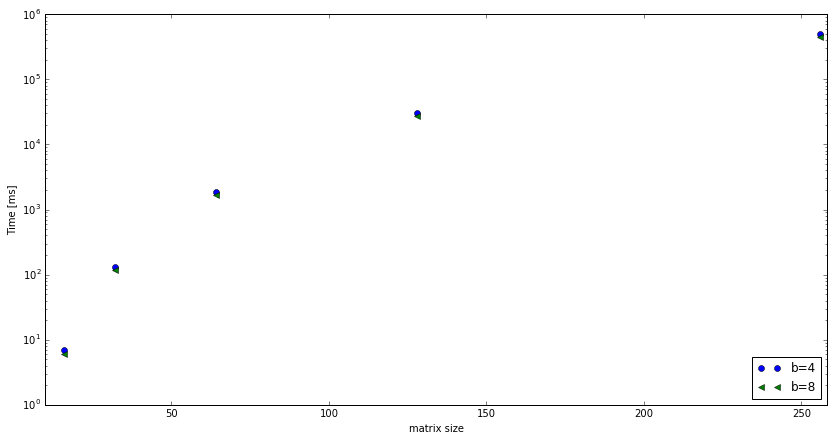

In [50]:
plt.figure(figsize=(14,7))
plt.yscale("log")
plt.xlim([10,258])
plt.plot(x, y1, 'o', label='b=4')
plt.plot(x, y2, '<', label='b=8')
plt.legend(loc=4)
plt.xlabel("matrix size")
plt.ylabel("Time [ms]")
plt.show()

# Blokkmérettől való függés, 128-as mátrixméret esetén

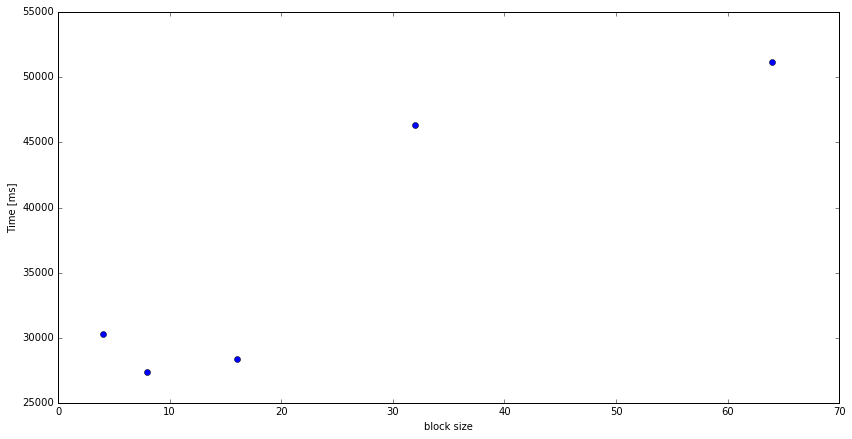

In [61]:
x1=[]
y1=[]
for k in times[128]:
    x1.append(k)
    y1.append(times[128][k])
plt.figure(figsize=(14,7))
plt.xlim([0,70])
plt.plot(x1, y1, 'o')
plt.xlabel("block size")
plt.ylabel("Time [ms]")
plt.show()

Az ábrán az látszik, hogy 8-as blokkméret esetén kapjuk a leggyorsabb futást.

# Példaeredmény generálása

In [62]:
%%bash
./genMatrix 32x32 > mat2d_1
./genMatrix 32x32 > mat2d_2
./genMatrix 32x32 > mat2d_3
./genMatrix 32x32x32 > mat3d
ls -laht mat*

-rw-r--r-- 1 attila users 270K Jun 19 14:54 mat3d
-rw-r--r-- 1 attila users 8.5K Jun 19 14:54 mat2d_3
-rw-r--r-- 1 attila users 8.5K Jun 19 14:54 mat2d_2
-rw-r--r-- 1 attila users 8.5K Jun 19 14:54 mat2d_1


In [63]:
%%bash
./main 4 1 "test"

Sum of abs of difference: 0.277295
Non block version time: 58315 ms
Block version time (b=4): 157 ms
